In [2]:
import pickle
import numpy as np
from sklearn import linear_model
import sklearn.metrics as sm
import matplotlib.pyplot as plt

In [3]:
# Вхідний файл, який містить дані
input_file = "data_singlevar_regr.txt"
# Завантаження даних
data = np.loadtxt(input_file, delimiter=",")
X, y = data[:, :-1], data[:, -1]

In [4]:
# Розбивка даних на навчальний та тестовий набори
num_training = int(0.8 * len(X))
num_test = len(X) - num_training

# Тренувальні дані
X_train, y_train = X[:num_training], y[:num_training]
# Тестові дані
X_test, y_test = X[num_training:], y[num_training:]

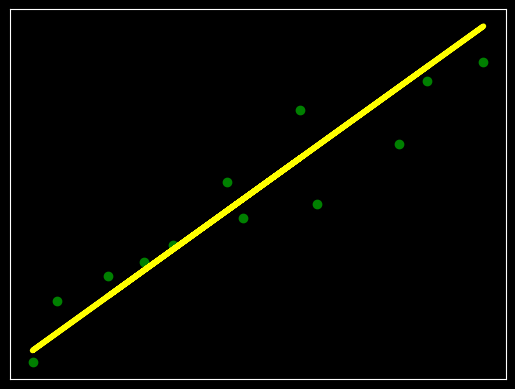

In [5]:
# Створення об'єкта лінійного регресора
regressor = linear_model.LinearRegression()
regressor.fit(X_train, y_train)
# Прогнозування результату
y_test_pred = regressor.predict(X_test)

# Побудова графіка
plt.scatter(X_test, y_test, color="green")
plt.plot(X_test, y_test_pred, color="yellow", linewidth=4)
plt.xticks(())
plt.yticks(())
plt.show()

In [6]:
print("Linear regressor performance:")
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2))
print(
    "Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)
)
print(
    "Explain variance score =",
    round(sm.explained_variance_score(y_test, y_test_pred), 2),
)
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Linear regressor performance:
Mean absolute error = 0.59
Mean squared error = 0.49
Median absolute error = 0.51
Explain variance score = 0.86
R2 score = 0.86


In [7]:
# Файл для збереження моделі
output_model_file = "model.pkl"
# Збереження моделі
with open(output_model_file, "wb") as f:
    pickle.dump(regressor, f)

    # Завантаження моделі
y_test_pred_new = regressor.predict(X_test)
print(
    "\nNew mean absolute error =",
    round(sm.mean_absolute_error(y_test, y_test_pred_new), 2),
)


New mean absolute error = 0.59
